# Naive Bayes Classifier

In [2]:
# Importing modules and libraries that is needed.
import numpy as np
import pandas as pd 
# (here I are not using CSV library instead I am using pandas which works faster then simple CSV library)

# Below module is used to display images.
import matplotlib.pyplot as plt

import string

## Reading Data 

In [3]:
df=pd.read_csv("A_Z Handwritten Data.csv")
df.head(5)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting Data into Training and Testing sets

In [4]:
data=df.values
np.random.shuffle(data)
percent_90=int(data.shape[0]*9/10)
training_data,testing_data=data[:percent_90,:],data[percent_90:,:]

training_data.shape,testing_data.shape

((335205, 785), (37245, 785))

## Converting Data sets into image Data and corresponding label value

In [5]:
y_train,x_train=training_data[:,0],training_data[:,1:]
y_test,x_test=testing_data[:,0],testing_data[:,1:]
x_train.shape,y_train.shape

((335205, 784), (335205,))

## Scaling Data 

In [6]:
# here we use threshold of --> 120. to scale this data.

x_train[x_train<=120]=0
x_train[x_train>120]=1
x_test[x_test<=120]=0
x_test[x_test>120]=1

In [7]:
 d={}
count=0
for i in string.ascii_uppercase:
    d[count]=i
    count+=1
print(d)

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}


## Displaying images.

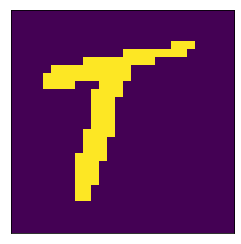

Value --> 'T'


In [8]:
plt.matshow(x_train[1].reshape(28,28))
plt.xticks(())  # remove x tick marks
plt.yticks(())  # remove y tick marks
plt.show()
print("Value --> '{}'".format(d[y_train[1]]))

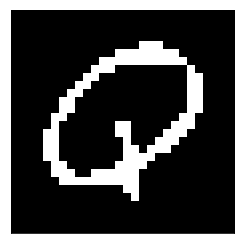

Value --> 'Q'


In [9]:
plt.matshow(x_train[2].reshape((28,28)),cmap=plt.cm.gray) # This will show the images in grayscale.
plt.xticks(())  # remove x tick marks
plt.yticks(())  # remove y tick marks
plt.show()
print("Value --> '{}'".format(d[y_train[2]]))

## Calculating Probability of each class

In [10]:
p_yt={}
t=df["0"].value_counts()/df.shape[0]
for i in t.keys():
    p_yt[i]=t[i]
print(p_yt)

{14: 0.15525573902537254, 18: 0.13000134246207545, 20: 0.07788427976909652, 2: 0.06285138944824809, 19: 0.060397368774332126, 15: 0.05192911800241643, 13: 0.051040408108470936, 0: 0.03723721304873137, 12: 0.033121224325412806, 11: 0.031107531212243255, 17: 0.0310538327292254, 4: 0.030715532286212915, 24: 0.029155591354544236, 22: 0.028954222043227278, 3: 0.027209021345147, 1: 0.02327292253993825, 9: 0.022803060813532016, 7: 0.01937978252114378, 23: 0.01683984427439925, 25: 0.01631359914082427, 16: 0.01560477916498859, 6: 0.015470532957443953, 10: 0.015043630017452007, 21: 0.011228352799033427, 5: 0.0031225667874882537, 8: 0.0030071150489998657}


## Calculating Conditional Probability of each pixel on the train data set

In [11]:
p_Xi={}
for k in range(0,26):
    l=[]
    for i in range(784):
        t=x_train[y_train==k][:,i]
        l.append(t.sum()/len(t))
    p_Xi[k]=l
print(p_Xi)

{0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.996161842315688e-05, 7.996161842315688e-05, 0.0, 0.0, 0.0, 7.996161842315688e-05, 0.00015992323684631377, 0.00015992323684631377, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.996161842315688e-05, 7.996161842315688e-05, 0.0, 0.0, 7.996161842315688e-05, 0.00015992323684631377, 0.00015992323684631377, 0.0, 0.0, 7.996161842315688e-05, 0.00023988485526947067, 0.00015992323684631377, 0.00015992323684631377, 7.996161842315688e-05, 7.996161842315688e-05, 7.996161842315688e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00031984647369262754, 0.0011994242763473534, 0.002158963697425236, 0.00487765872381257, 0.0119942427

## Predicting the labels of test data using train data

In [12]:
final=[]
for i in range(len(x_test)):
    test_case=x_test[i]
    product_k=[]
    for i in p_Xi:
        l=1
        count=0
        for j in p_Xi[i]:
            # Since we have scaled images to 0 and 1 so there is no "Inference Issues occur" so we can directly multiply this values.
            l=l*(j*test_case[count]+(1-test_case[count])*(1-j))
            count+=1
        product_k.append(l*p_yt[i])
    ss=sum(product_k)
    product_k=np.array(product_k)
    product_k=product_k/ss
    # product is gives the probabilities of the images given classes.(conditional probabilities)
    final.append(product_k.argmax())
    # we are appending the the label that has heighest probabilty among all.

## Model accuracy

In [13]:
final=np.array(final)
score=(y_test==final).sum()/len(final)
print("Our Model accuracy is --> '{}'".format(score))

Our Model accuracy is --> '0.7071553228621291'


## Confusion Matrix
>`Matrix b/w true ground label and predicted groud label.`<br>
>`It gives us a breif idea of where does our code fails.`

In [14]:
matrix=np.zeros((26,26))
for i in range(26):
    for j in range(26):
        matrix[i][j]=(final[y_test==i]==j).sum()
print(matrix)

[[9.940e+02 1.700e+01 0.000e+00 1.000e+00 5.000e+00 0.000e+00 1.800e+01
  5.900e+01 0.000e+00 3.000e+00 1.300e+01 0.000e+00 6.100e+01 3.200e+01
  2.000e+00 1.600e+01 1.600e+01 4.300e+01 1.000e+00 0.000e+00 8.000e+00
  0.000e+00 9.000e+00 3.700e+01 2.800e+01 0.000e+00]
 [4.300e+01 6.170e+02 3.000e+00 2.500e+01 1.500e+01 0.000e+00 4.000e+00
  1.600e+01 1.000e+00 1.600e+01 0.000e+00 1.000e+00 1.000e+01 1.100e+01
  1.700e+01 1.100e+01 3.000e+00 6.000e+00 1.900e+01 0.000e+00 2.000e+00
  0.000e+00 1.000e+00 4.000e+00 1.200e+01 1.600e+01]
 [0.000e+00 2.900e+01 1.725e+03 4.000e+00 7.700e+01 3.000e+00 3.200e+01
  1.000e+00 0.000e+00 1.200e+01 2.500e+01 1.000e+02 1.900e+01 2.000e+01
  1.290e+02 4.500e+01 2.200e+01 5.000e+00 2.000e+00 1.100e+01 2.800e+01
  0.000e+00 8.000e+01 0.000e+00 4.000e+00 4.000e+00]
 [1.600e+01 4.000e+01 2.000e+00 6.900e+02 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 3.600e+01 0.000e+00 6.000e+00 4.000e+00 1.000e+01
  1.070e+02 1.800e+01 1.100e+01 0.000e+00 8.000e+

## Some observation's

In [15]:
# So basically here I am checking that where does my model gets confused too much.
# I am checking where my model predicted incorret label more then 10%.  
# I am checking that labels.

for yy in range(26):
    gg=sum(matrix[yy]>(sum(matrix[yy])*10/100))-1
    if gg>0:
        print(yy,"-->",gg)

3 --> 1
7 --> 1
9 --> 1
17 --> 2
20 --> 1
23 --> 1


In [27]:
index=(matrix[3]==sorted(matrix[3])[-2]).argmax()
print("('{}','{}')".format(d[index],d[3]))

('O','D')


In [28]:
index=(matrix[7]==sorted(matrix[7])[-2]).argmax()
print("('{}','{}')".format(d[index],d[7]))

('N','H')


In [29]:
index=(matrix[9]==sorted(matrix[9])[-2]).argmax()
print("('{}','{}')".format(d[index],d[9]))

('T','J')


In [30]:
index=(matrix[17]==sorted(matrix[17])[-2]).argmax()
print("('{}','{}')".format(d[index],d[17]))

('K','R')


In [34]:
index=(matrix[17]==sorted(matrix[17])[-3]).argmax()
print("('{}','{}')".format(d[index],d[17]))

('A','R')


In [31]:
index=(matrix[20]==sorted(matrix[20])[-2]).argmax()
print("('{}','{}')".format(d[index],d[20]))

('W','U')


In [32]:
index=(matrix[23]==sorted(matrix[23])[-2]).argmax()
print("('{}','{}')".format(d[index],d[23]))

('Y','X')


## Using seaborn to show confusion matrix 
>**`"Actual values are 100 times of this values that are shown in the heat map"`**

Text(208.5, 0.5, 'Actual Labels')

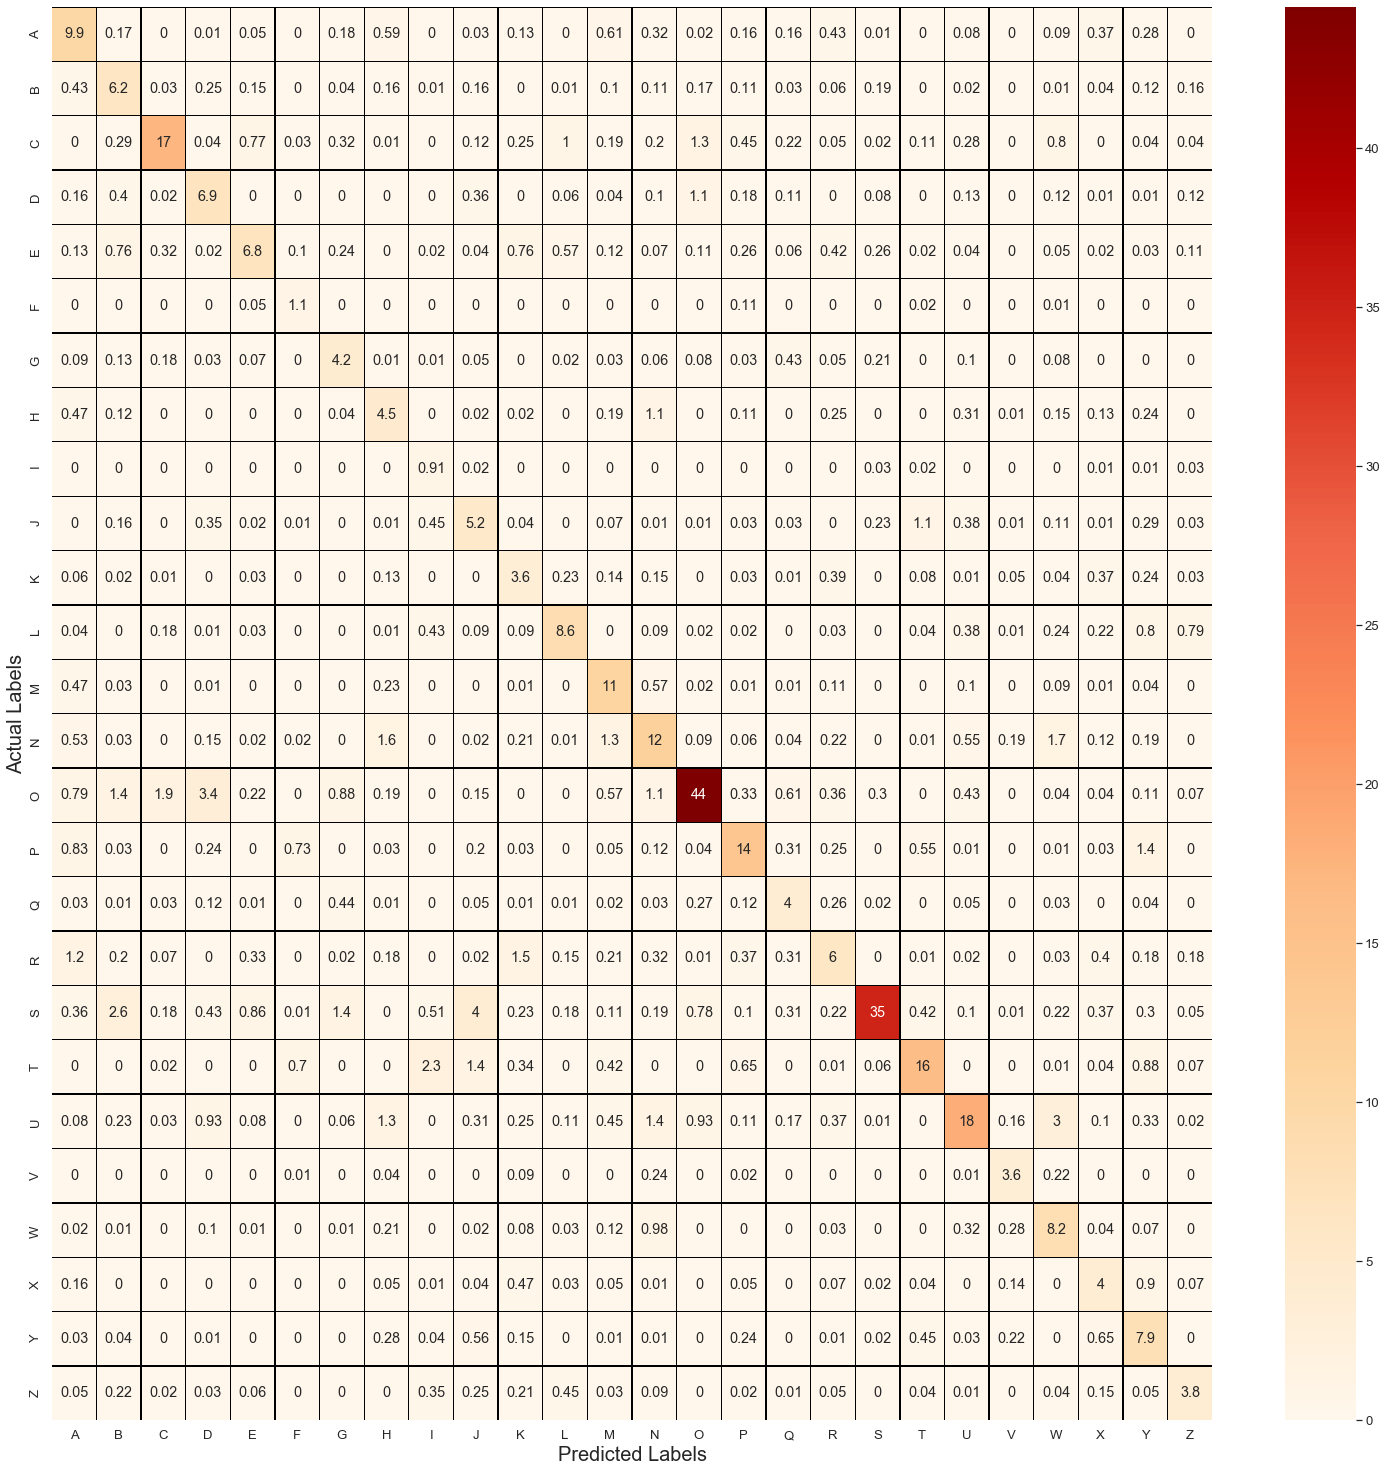

In [69]:
import seaborn as sn
df_cm = pd.DataFrame(matrix/100)

index = [d[i] for i in d]
columns = [d[i] for i in d]

plt.figure(figsize = (26,26))
sn.heatmap(df_cm,xticklabels=index,yticklabels=columns, annot=True,cmap="OrRd",linecolor='black',linewidths=0.3)
plt.xlabel("Predicted Labels",fontsize=20)
plt.ylabel("Actual Labels",fontsize=20)